In [ ]:
!shred -u setup_colab.py
!shred -u setup_colab_general.py
!wget -q "https://github.com/jpcano1/python_utils/raw/main/setup_colab_general.py" -O setup_colab_general.py
!wget -q "https://github.com/jpcano1/python_utils/raw/main/MINE_4101/setup_colab.py" -O setup_colab.py
import setup_colab as setup
setup.setup_lab6()

## **Taller**
- Un estudio nutricional ha realizado un experimento a 78 pacientes para demostrar 3 diferentes tipos de dietas que quieren llevar al mercado. Sin embargo por falta de presupuesto solo pueden lanzar al mercado una de las dietas que experimentaron. Para ello le han propuesto realizar un estudio ANOVA para determinar cual es el tipo de dieta que deberían lanzar al mercado. Siguiendo la metodología de ANOVA, realice los siguientes pasos:
    1. Importe los datos del archivo `Diet.xlsx`
    2. Realice un nuevo campo con la diferencia de peso registrado entre las 6 semanas de estudio.
    3. Verifique los supuestos y realice las modificaciones necesarias. 
    4. Determine si existe suficientes pruebas estadísticas para demostrar que las dietas no son iguales.
    5. Determine el mejor tipo de dieta para lanzar al mercado

- Un expertó sugirió que el peso de los pacientes no sólo influía por la dieta realizada, sino también por el género del paciente. Por lo tanto le pidió que repita el procedimiento anterior realizando un ANOVA de dos factores para determinar cual es la mejor dieta para cada género.

In [ ]:
# load packages
import pandas as pd
import numpy as np

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
diet = pd.read_excel('./data/Diet.xlsx')
diet

,gender,Diet,weight,weight6weeks
0,M,B,60,60.0
1,M,B,103,103.0
2,F,A,58,54.2
3,F,A,60,54.0
4,F,A,64,63.3
...,...,...,...,...
73,M,C,83,80.2
74,M,C,84,79.9
75,M,C,85,79.7
76,M,C,87,77.8


In [ ]:
diet['Diff'] =  diet['weight6weeks'] - diet['weight']
diet.head()

,gender,Diet,weight,weight6weeks,Diff
0,M,B,60,60.0,0.0
1,M,B,103,103.0,0.0
2,F,A,58,54.2,-3.8
3,F,A,60,54.0,-6.0
4,F,A,64,63.3,-0.7


### **Anova de una vía**

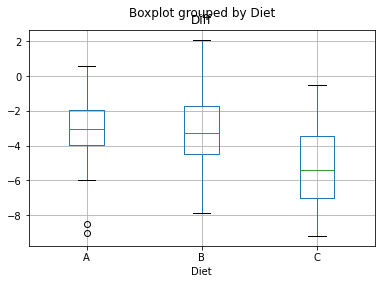

In [ ]:
diet.boxplot('Diff',by='Diet')
plt.show()

In [ ]:
fvalue, pvalue = stats.f_oneway(diet[diet['Diet']=='A']['Diff'],diet[diet['Diet']=='B']['Diff'],diet[diet['Diet']=='C']['Diff'])
print(fvalue, pvalue)

6.197447453165349 0.0032290142385893524


In [ ]:
# Modelo Ordinary Least Squares (OLS)
diet_diff = diet[['Diet','Diff']]
model = ols('Diff ~ C(Diet)', data=diet_diff).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Diet),71.093689,2.0,6.197447,0.003229
Residual,430.179259,75.0,NaN,NaN


### **Interpretación**
El valor P obtenido del análisis ANOVA es significativo (P &lt;0.05) y, por lo tanto, concluimos que existen diferencias significativas entre las dietas.

### **Comparación entre pares de dietas**
Según el análisis de ANOVA, sabemos que las diferencias de dietas son estadísticamente significativas, pero ANOVA no dice qué dietas son significativamente diferentes entre sí. Para conocer los pares de dietas diferentes significativos, realizaremos análisis de comparación múltiple por pares (comparación post-hoc) usando la prueba Tukey HSD.

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,0.2741,0.9,-1.3325,1.8806,False
A,C,-1.8481,0.0201,-3.4547,-0.2416,True
B,C,-2.1222,0.0048,-3.6808,-0.5636,True


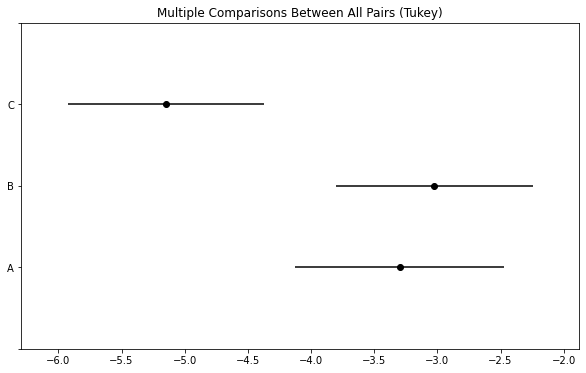

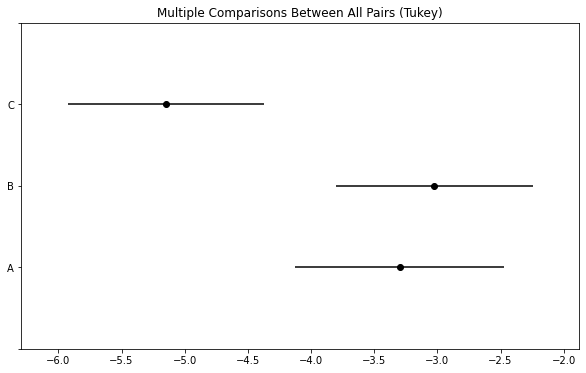

In [ ]:
m_comp = pairwise_tukeyhsd(endog=diet_diff['Diff'], groups=diet_diff['Diet'], alpha=0.05)
display(m_comp.summary())
m_comp.plot_simultaneous()

### **Interpretación**
- Los resultados anteriores de Tukey HSD sugieren que, excepto A-B, todas las demás comparaciones por pares para dietas rechazan la hipótesis nula e indican diferencias estadísticamente significativas.


### **Supuestos de Test ANOVA**



<p>La prueba de Levene se puede utilizar para verificar la homogeneidad de las varianzas. Hipótesis nula: las muestras de poblaciones tienen varianzas iguales.</p>


In [ ]:
w, pvalue = stats.levene(diet[diet['Diet']=='A']['Diff'],
                         diet[diet['Diet']=='B']['Diff'],
                         diet[diet['Diet']=='C']['Diff'])
print(w, pvalue)

0.6256665777896312 0.5376731304274011



<p>Como el valor P no es significativo (&gt; 0.05), no podemos rechazar la hipótesis nula de igualdad de varianzas.</p>



<p>La prueba de Shapiro-Wilk se puede usar para verificar la distribución normal de los residuos. Hipótesis nula: los datos provienen de una distribución normal.</p>


In [ ]:
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9920804500579834 0.9160668253898621



<p>Como el valor P no es significativo, no podemos rechazar la hipótesis nula y concluir que los datos se extraen de la distribución normal.</p>


### **Anova de Dos Vías**

In [ ]:
diet = pd.read_excel('./data/Diet.xlsx')
diet.head()

,gender,Diet,weight,weight6weeks
0,M,B,60,60.0
1,M,B,103,103.0
2,F,A,58,54.2
3,F,A,60,54.0
4,F,A,64,63.3


In [ ]:
diet["Diff"] = diet["weight6weeks"] - diet["weight"]

In [ ]:
diet.head()

,gender,Diet,weight,weight6weeks,Diff
0,M,B,60,60.0,0.0
1,M,B,103,103.0,0.0
2,F,A,58,54.2,-3.8
3,F,A,60,54.0,-6.0
4,F,A,64,63.3,-0.7


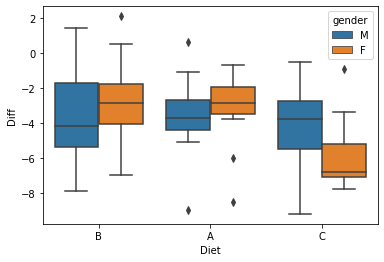

In [ ]:
sns.boxplot(data=diet, x="Diet", y="Diff", hue="gender")
plt.show()

In [ ]:
model = ols('Diff ~ C(Diet) + C(gender) + C(Diet):C(gender)', data=diet).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Diet),71.007031,2.0,6.313248,0.002977
C(gender),0.135526,1.0,0.024099,0.877067
C(Diet):C(gender),25.140704,2.0,2.235264,0.114336
Residual,404.903029,72.0,NaN,NaN


- De la anterior prueba se tiene que para la dieta hay un p-value menor a 0.05, por lo que hay influencia de la dieta en la diferencia del peso.
- Por otra parte, el p-value resultante de la prueba para el género fue mucho mayor a 0.05, por lo que se concluye que el género no tiene influencia
- Finalmente, el p-value de la dieta con el género también fue mayor que 0.05, por lo tanto, no hay influencia significativa de estas dos variables conjuntas sobre la diferencia del peso.

### **Supuestos de Test Anova**

In [ ]:
m_comp = pairwise_tukeyhsd(endog=diet_gender["Diff"],
                           groups=diet_gender["gender"])
m_comp.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
F,M,0.1073,0.8583,-1.0569,1.2715,False


- Del anterior test se concluye, nuevamente, que no se puede rechazar la hipótesis nula.

In [ ]:
_, p_value = stats.shapiro(model.resid)

In [ ]:
p_value

0.2526903450489044

- Como el p-value de la prueba de shapiro no es significativo, concluimos que los residuos no tienen distribución normal.